# electricity dataset 

In [1]:
# Imports
import os
import sys
BASE_DIR = os.path.dirname(os.getcwd())
sys.path.append(BASE_DIR)
import torch
import numpy as np
import pandas as pd

# Opendataval
from dataval.dataloader import Register, DataFetcher, mix_labels, add_gauss_noise
from dataval.datavaluation import NDDV, NDSV
from dataval.experiment import ExperimentMediator

import warnings
warnings.filterwarnings("ignore")

[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
DataFetcher.datasets_available()

{'2dplanes',
 'MiniBooNE',
 'adult',
 'bbc',
 'bbc-embeddings',
 'breast_cancer',
 'challenge-iris',
 'cifar10',
 'cifar10-embeddings',
 'cifar100',
 'cifar100-embeddings',
 'creditcard',
 'diabetes',
 'digits',
 'echoMonths',
 'election',
 'electricity',
 'fashion',
 'fmnist-embeddings',
 'fried',
 'gaussian_classifier',
 'gaussian_classifier_high_dim',
 'imdb',
 'imdb-embeddings',
 'iris',
 'linnerud',
 'lowbwt',
 'mnist',
 'mnist-embeddings',
 'mv',
 'nomao',
 'pol',
 'stl10-embeddings',
 'stock',
 'svhn-embeddings',
 'vehicle_sensIT',
 'wave_energy',
 'webdata_wXa'}

## [Step 1] Set up an environment
`ExperimentMediator` is a fundamental concept in establishing the `opendataval` environment. It empowers users to configure hyperparameters, including a dataset, a type of synthetic noise, and a prediction model. With  `ExperimentMediator`, users can effortlessly compute various data valuation algorithms.

The following code cell demonstrates how to set up `ExperimentMediator` with a pre-registered dataset and a prediction model.
- Dataset: adult
- Model: sklearn's logistic regression model
- Metric: Classification accuracy

In [3]:
dataset_name = "electricity"
train_count, valid_count, test_count, meta_count = 1000, 100, 300, 100
noise_rate = 0.1
noise_kwargs = {'noise_rate': noise_rate}
max_epoch = 3
batch_size = 32
lr = 0.01
random_state = 42
train_kwargs = {"epochs": max_epoch, "batch_size": batch_size, "lr": lr}
model_name = "classifiermlp"   # "sklogreg"
# model_name = "LogisticRegression"
metric_name = "accuracy"
cache_dir = "../data_files/"
add_noise = mix_labels
noise_type = "mix_labels"
device = 'cpu'

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir=cache_dir,  
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    meta_count=meta_count,
    add_noise=add_noise, 
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    random_state = random_state,
    model_name=model_name,
    metric_name=metric_name,
    device=device
)

Base line model metric_name='accuracy': perf=0.75


A full list of registered datasets can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/dataloader/fetcher.py#L121). A list of available  prediction models can be found [here](https://github.com/opendataval/opendataval/blob/main/opendataval/model/__init__.py#L111).

## [Step 2] Compute data values
`opendataval` provides various state-of-the-art data valuation algorithms. `ExperimentMediator.compute_data_values()` computes data values.

In [4]:
data_evaluators = [NDSV(mfg_epochs=50, base_model=model_name, meta_interval=4, Ntime=3, batch_size=batch_size, weight_decay=5e-4, meta_weight_decay=1e-4,meta_hidden_size=100, interpret=True,kernel='Matern52')]

In [5]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

Interpretation NDDV model


  2%|▏         | 1/50 [00:00<00:42,  1.15it/s]

Epoch: 0, Test Accuracy: 55.00%


  4%|▍         | 2/50 [00:01<00:40,  1.18it/s]

Epoch: 1, Test Accuracy: 58.33%


  6%|▌         | 3/50 [00:02<00:39,  1.18it/s]

Epoch: 2, Test Accuracy: 55.33%


  8%|▊         | 4/50 [00:03<00:39,  1.15it/s]

Epoch: 3, Test Accuracy: 59.33%


 10%|█         | 5/50 [00:04<00:38,  1.17it/s]

Epoch: 4, Test Accuracy: 69.33%


 12%|█▏        | 6/50 [00:05<00:37,  1.17it/s]

Epoch: 5, Test Accuracy: 72.00%


 14%|█▍        | 7/50 [00:05<00:36,  1.17it/s]

Epoch: 6, Test Accuracy: 74.00%


 16%|█▌        | 8/50 [00:06<00:36,  1.16it/s]

Epoch: 7, Test Accuracy: 72.33%


 18%|█▊        | 9/50 [00:07<00:35,  1.14it/s]

Epoch: 8, Test Accuracy: 71.00%


 20%|██        | 10/50 [00:08<00:35,  1.14it/s]

Epoch: 9, Test Accuracy: 71.33%


 22%|██▏       | 11/50 [00:09<00:34,  1.12it/s]

Epoch: 10, Test Accuracy: 70.67%


 24%|██▍       | 12/50 [00:10<00:34,  1.09it/s]

Epoch: 11, Test Accuracy: 71.67%


 26%|██▌       | 13/50 [00:11<00:33,  1.09it/s]

Epoch: 12, Test Accuracy: 64.33%


 28%|██▊       | 14/50 [00:12<00:32,  1.10it/s]

Epoch: 13, Test Accuracy: 62.00%


 30%|███       | 15/50 [00:13<00:31,  1.10it/s]

Epoch: 14, Test Accuracy: 71.00%


 32%|███▏      | 16/50 [00:14<00:30,  1.11it/s]

Epoch: 15, Test Accuracy: 68.67%


 34%|███▍      | 17/50 [00:15<00:30,  1.09it/s]

Epoch: 16, Test Accuracy: 71.67%


 36%|███▌      | 18/50 [00:15<00:28,  1.10it/s]

Epoch: 17, Test Accuracy: 72.67%


 38%|███▊      | 19/50 [00:16<00:27,  1.11it/s]

Epoch: 18, Test Accuracy: 72.67%


 40%|████      | 20/50 [00:17<00:27,  1.11it/s]

Epoch: 19, Test Accuracy: 74.67%


 42%|████▏     | 21/50 [00:18<00:26,  1.11it/s]

Epoch: 20, Test Accuracy: 74.00%


 44%|████▍     | 22/50 [00:19<00:25,  1.11it/s]

Epoch: 21, Test Accuracy: 70.67%


 46%|████▌     | 23/50 [00:20<00:24,  1.10it/s]

Epoch: 22, Test Accuracy: 73.67%


 48%|████▊     | 24/50 [00:21<00:23,  1.11it/s]

Epoch: 23, Test Accuracy: 78.00%


 50%|█████     | 25/50 [00:22<00:22,  1.11it/s]

Epoch: 24, Test Accuracy: 78.67%


 52%|█████▏    | 26/50 [00:23<00:21,  1.13it/s]

Epoch: 25, Test Accuracy: 73.33%


 54%|█████▍    | 27/50 [00:24<00:20,  1.13it/s]

Epoch: 26, Test Accuracy: 70.00%


 56%|█████▌    | 28/50 [00:24<00:19,  1.13it/s]

Epoch: 27, Test Accuracy: 72.67%


 58%|█████▊    | 29/50 [00:25<00:18,  1.12it/s]

Epoch: 28, Test Accuracy: 72.33%


 60%|██████    | 30/50 [00:26<00:17,  1.14it/s]

Epoch: 29, Test Accuracy: 76.00%


 62%|██████▏   | 31/50 [00:27<00:16,  1.14it/s]

Epoch: 30, Test Accuracy: 75.33%


 64%|██████▍   | 32/50 [00:28<00:15,  1.16it/s]

Epoch: 31, Test Accuracy: 77.33%


 66%|██████▌   | 33/50 [00:29<00:14,  1.16it/s]

Epoch: 32, Test Accuracy: 76.33%


 68%|██████▊   | 34/50 [00:30<00:13,  1.15it/s]

Epoch: 33, Test Accuracy: 75.67%


 70%|███████   | 35/50 [00:30<00:13,  1.15it/s]

Epoch: 34, Test Accuracy: 75.00%


 72%|███████▏  | 36/50 [00:31<00:12,  1.16it/s]

Epoch: 35, Test Accuracy: 75.00%


 74%|███████▍  | 37/50 [00:32<00:11,  1.15it/s]

Epoch: 36, Test Accuracy: 75.00%


 76%|███████▌  | 38/50 [00:33<00:10,  1.15it/s]

Epoch: 37, Test Accuracy: 75.67%


 78%|███████▊  | 39/50 [00:34<00:09,  1.16it/s]

Epoch: 38, Test Accuracy: 75.00%


 80%|████████  | 40/50 [00:35<00:08,  1.15it/s]

Epoch: 39, Test Accuracy: 76.00%


 82%|████████▏ | 41/50 [00:36<00:07,  1.15it/s]

Epoch: 40, Test Accuracy: 76.00%


 84%|████████▍ | 42/50 [00:37<00:06,  1.15it/s]

Epoch: 41, Test Accuracy: 76.67%


 86%|████████▌ | 43/50 [00:37<00:06,  1.15it/s]

Epoch: 42, Test Accuracy: 76.33%


 88%|████████▊ | 44/50 [00:38<00:05,  1.14it/s]

Epoch: 43, Test Accuracy: 76.67%


 90%|█████████ | 45/50 [00:39<00:04,  1.13it/s]

Epoch: 44, Test Accuracy: 76.67%


 92%|█████████▏| 46/50 [00:40<00:03,  1.15it/s]

Epoch: 45, Test Accuracy: 77.00%


 94%|█████████▍| 47/50 [00:41<00:02,  1.14it/s]

Epoch: 46, Test Accuracy: 77.00%


 96%|█████████▌| 48/50 [00:42<00:01,  1.15it/s]

Epoch: 47, Test Accuracy: 77.00%


 98%|█████████▊| 49/50 [00:43<00:00,  1.14it/s]

Epoch: 48, Test Accuracy: 77.00%


100%|██████████| 50/50 [00:44<00:00,  1.13it/s]

Epoch: 49, Test Accuracy: 77.00%


Elapsed time NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52): 0:00:44.518072
CPU times: total: 4min 20s
Wall time: 44.5 s


## [Step 3] Evaluate data values

In [6]:
from dataval.experiment.exper_methods import (
    dynamic_data_state,
    dynamic_data_costate,
    dynamic_data_values,
    extract_loss,
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    remove_high_value,
    remove_low_value,
    add_low_high,
    add_high_value,
    add_low_value,
    save_dataval
)
from matplotlib import pyplot as plt

In [7]:
# Saving the results with percent 10%
percent = 0.1
output_dir = f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/"
exper_med.set_output_directory(output_dir)
output_dir

'../results/NDDV_traj_electricity_classifiermlp_mix_labels_noise_rate=0.1_train_count=1000_percent=0.1/'

### Noisy data detection 
- `noisy_detection` performs the noisy data detection task and evaluates the F1-score of each data valuation algorithm's prediction. The higher, the better.  
  - noisy data: mislabeled data

In [8]:
exper_med.evaluate(noisy_detection, save_output=True)

,kmeans_f1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.362903


### Save train and meta loss

In [9]:
exper_med.compute_train_loss(extract_loss, save_output=True)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
train_loss,0.000981,-0.002802,-0.002474,-0.003073,-0.003815,-0.005143,-0.012572,-0.012229,-0.013280,-0.008112,...,-0.008867,-0.006473,-0.010323,-0.008144,-0.008762,-0.005487,-0.007502,-0.008332,-0.004302,-0.009631
meta_loss,-0.000089,0.000363,-0.000265,-0.000143,-0.000402,-0.000006,-0.001163,-0.001068,0.001366,0.000109,...,-0.001999,-0.000560,-0.001264,0.000162,-0.000412,0.000418,0.000626,0.003154,0.000556,0.000309


### Data points state trajectory

In [10]:
time, state_traject = exper_med.compute_data_state(dynamic_data_state)
print(state_traject.shape)

(4, 1000, 1)


In [11]:
import matplotlib.font_manager as fm
fonts = fm.findSystemFonts()
for font in fonts:
    if "Times" in font:
        print(font)

C:\Users\Administrator\AppData\Local\Microsoft\Windows\Fonts\Times New Roman Bold.ttf


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter

# font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
font_path = '../Times_New_Roman_Bold.ttf'
font_prop_title = FontProperties(fname=font_path, size=18)
font_prop_xy = FontProperties(fname=font_path, size=16)
font_prop_ax = FontProperties(fname=font_path, size=14)

def plot_state_trajectories(time_span, trajectories):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    t_index = np.where(time_span == 1)[0][0]
    end_values = trajectories[-1, :, 0]
    sorted_indices = np.argsort(end_values)
    
    colors = ['coral', 'darkviolet']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=4)
    
    fine_time_span = np.linspace(time_span.min(), time_span.max(), 100)
    
    save_path = os.path.join(output_dir, "state_traj.csv")    
    
    all_trajectories = []
    for i in sorted_indices:
        if trajectories[t_index, i, 0] > 2:
            continue
        trajectory = trajectories[:, i, 0]
        trajectory = np.nan_to_num(trajectory, nan=np.nanmean(trajectory), posinf=np.max(trajectory), neginf=np.min(trajectory))
        interp_func = CubicSpline(time_span, trajectory, bc_type='not-a-knot')
        # interp_func = interp1d(time_span, trajectories[:, i, 0], kind='cubic')
        # interp_func = PchipInterpolator(time_span, trajectory)
        fine_trajectory = interp_func(fine_time_span)
        
        all_trajectories.append(fine_trajectory)
        
        color_index = np.where(sorted_indices == i)[0][0] / (len(sorted_indices) - 1)
        color = cmap(color_index)
            
        ax.plot(fine_time_span, fine_trajectory, color=color, alpha=0.2)
    
    ax.set_xlabel(r"$t$", fontproperties=font_prop_xy)
    ax.set_ylabel(r"$X_t$", fontproperties=font_prop_xy)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop_ax)
        
    # y_formatter = ScalarFormatter(useMathText=True)
    # y_formatter.set_scientific(True)
    # y_formatter.set_powerlimits((-1,1))
    # ax.yaxis.set_major_formatter(y_formatter)
    # ax.yaxis.get_offset_text().set_fontproperties(font_prop_ax)
    
    y_formatter = FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.get_offset_text().set_fontproperties(font_prop_ax)
        
    np.savetxt(save_path, np.array(all_trajectories).T, delimiter=',')

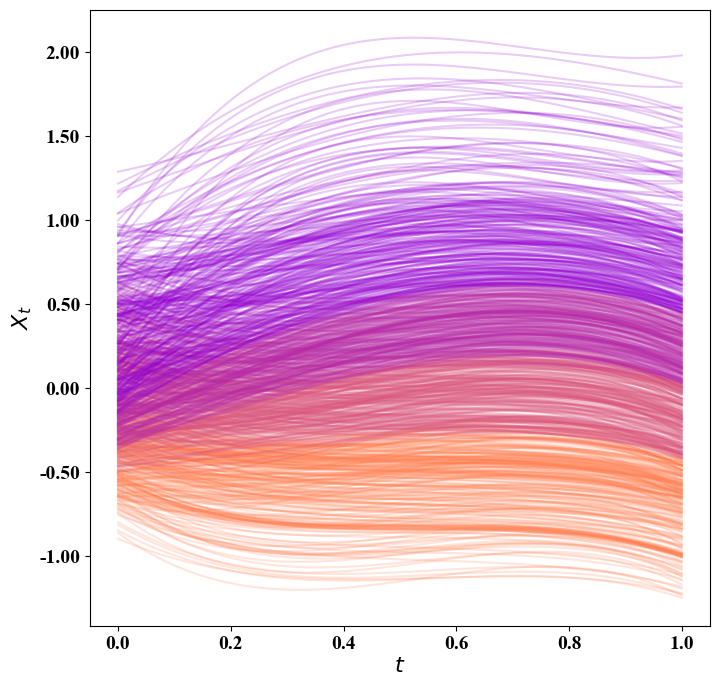

In [13]:
from PIL import Image
import io
plot_state_trajectories(time, state_traject)
plt.savefig(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/state_traj.pdf", bbox_inches='tight', dpi=600)

buf = io.BytesIO()
plt.savefig(buf, format='tiff', dpi=600, bbox_inches='tight')
buf.seek(0)

img = Image.open(buf)

img.save(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/state_traj.tif", compression="tiff_lzw")

buf.close()

### Data points co-state trajectory

In [14]:
time, costate_traject = exper_med.compute_data_state(dynamic_data_costate)
print(costate_traject.shape)

(4, 1000, 1)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.interpolate import PchipInterpolator
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter

# font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
font_path = '../Times_New_Roman_Bold.ttf'
font_prop_title = FontProperties(fname=font_path, size=18)
font_prop_xy = FontProperties(fname=font_path, size=16)
font_prop_ax = FontProperties(fname=font_path, size=14)

def plot_costate_trajectories(time_span, trajectories):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    end_values = trajectories[-1, :, 0]
    sorted_indices = np.argsort(end_values)
    
    colors = ['coral', 'darkviolet']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=4)
    
    fine_time_span = np.linspace(time_span.min(), time_span.max(), 100)
    
    save_path = os.path.join(output_dir, "costate_traj.csv")
    
    all_trajectories = []
    for i in sorted_indices:
        trajectory = trajectories[:, i, 0]
        trajectory = np.nan_to_num(trajectory, nan=np.nanmean(trajectory), posinf=np.max(trajectory), neginf=np.min(trajectory))
        interp_func = CubicSpline(time_span, trajectory, bc_type='not-a-knot')
        # interp_func = interp1d(time_span, trajectories[:, i, 0], kind='cubic')
        # interp_func = PchipInterpolator(time_span, trajectory)
        fine_trajectory = interp_func(fine_time_span)
        
        all_trajectories.append(fine_trajectory)
        
        color_index = np.where(sorted_indices == i)[0][0] / (len(sorted_indices) - 1)
        color = cmap(color_index)
            
        ax.plot(fine_time_span, fine_trajectory, color=color, alpha=0.3)
    
    ax.set_xlabel(r"$t$", fontproperties=font_prop_xy)
    ax.set_ylabel(r"$Y_t$", fontproperties=font_prop_xy)
    ax.tick_params(axis='both', which='major', labelsize=14)
    # ax.set_xlim(fine_time_span.max(), fine_time_span.min())
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop_ax)
        
    # y_formatter = ScalarFormatter(useMathText=True)
    # y_formatter.set_scientific(True)
    # y_formatter.set_powerlimits((-1,1))
    # ax.yaxis.set_major_formatter(y_formatter)
    # ax.yaxis.get_offset_text().set_fontproperties(font_prop_ax)
    
    y_formatter = FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.get_offset_text().set_fontproperties(font_prop_ax)
        
    np.savetxt(save_path, np.array(all_trajectories).T, delimiter=',')

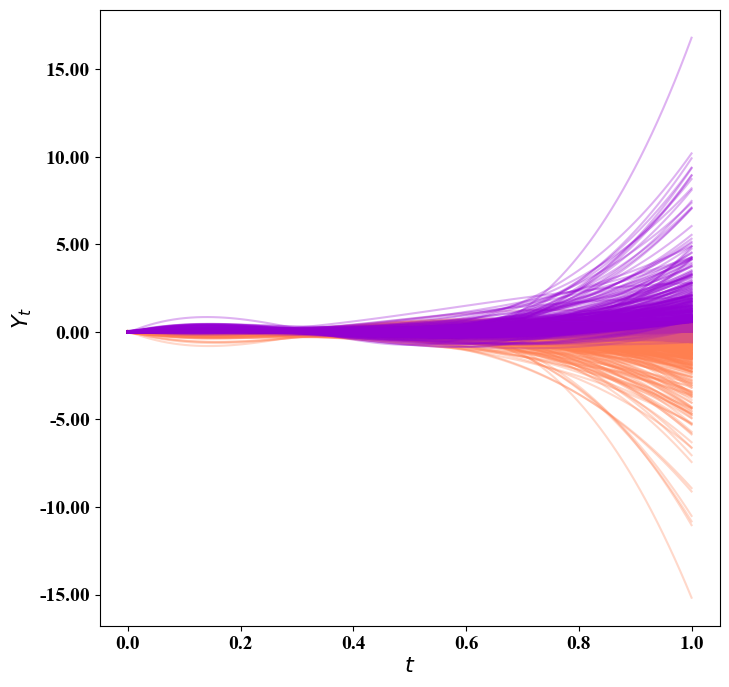

In [16]:
from PIL import Image
import io
plot_costate_trajectories(time, costate_traject)
plt.savefig(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/costate_traj.pdf", bbox_inches='tight', dpi=600)

buf = io.BytesIO()
plt.savefig(buf, format='tiff', dpi=600, bbox_inches='tight')
buf.seek(0)

img = Image.open(buf)

img.save(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/costate_traj.tif", compression="tiff_lzw")

buf.close()

### Data points value trajectory

In [17]:
import numpy as np

def normalize_gradients(gradients, new_min=-1, new_max=1):
    min_val = np.min(gradients)
    max_val = np.max(gradients)
    if min_val == max_val:
        return np.full(gradients.shape, new_min)
    normalized_gradients = (gradients - min_val) / (max_val - min_val)
    normalized_gradients = normalized_gradients * (new_max - new_min) + new_min
    
    return normalized_gradients

In [18]:
# time, value_traject = exper_med.compute_state_values(dynamic_data_values)
value_traject = -state_traject * costate_traject
num_points = value_traject.shape[1] - 1
sum_values = value_traject.sum(axis=1, keepdims=True)
value_traject = value_traject * (1 + 1 / num_points) - sum_values / num_points
# value_traject = normalize_gradients(value_traject)
print(value_traject.shape)

(4, 1000, 1)


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.font_manager import FontProperties
from scipy.interpolate import interp1d
from scipy.interpolate import CubicSpline
from scipy.stats import gaussian_kde
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter

# font_path = '/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman_Bold.ttf'
font_path = '../Times_New_Roman_Bold.ttf'
font_prop_title = FontProperties(fname=font_path, size=18)
font_prop_xy = FontProperties(fname=font_path, size=16)
font_prop_ax = FontProperties(fname=font_path, size=14)

def plot_value_trajectories(time_span, trajectories):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    end_values = trajectories[-1, :, 0]
    sorted_indices = np.argsort(end_values)
    
    colors = ['coral', 'darkviolet']
    cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=4)
    
    fine_time_span = np.linspace(time_span.min(), time_span.max(), 100)
    
    save_path = os.path.join(output_dir, "value_traj.csv")
    
    all_trajectories = []
    for i in sorted_indices:
        trajectory = trajectories[:, i, 0]
        trajectory = np.nan_to_num(trajectory, nan=np.nanmean(trajectory), posinf=np.max(trajectory), neginf=np.min(trajectory))
        interp_func = CubicSpline(time_span, trajectory, bc_type='not-a-knot')
        # interp_func = interp1d(time_span, trajectories[:, i, 0], kind='cubic')
        # interp_func = PchipInterpolator(time_span, trajectory)
        fine_trajectory = interp_func(fine_time_span)
        
        all_trajectories.append(fine_trajectory)
        
        color_index = np.where(sorted_indices == i)[0][0] / (len(sorted_indices) - 1)
        color = cmap(color_index)
            
        ax.plot(fine_time_span, fine_trajectory, color=color, alpha=0.3)
        
    ax.set_xlabel(r"$t$", fontproperties=font_prop_xy)
    ax.set_ylabel(r"$\phi_t$", fontproperties=font_prop_xy)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_prop_ax)
        
    # y_formatter = ScalarFormatter(useMathText=True)
    # y_formatter.set_scientific(True)
    # y_formatter.set_powerlimits((-1,1))
    # ax.yaxis.set_major_formatter(y_formatter)
    # ax.yaxis.get_offset_text().set_fontproperties(font_prop_ax)
    
    y_formatter = FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(y_formatter)
    ax.yaxis.get_offset_text().set_fontproperties(font_prop_ax)
        
    np.savetxt(save_path, np.array(all_trajectories).T, delimiter=',')

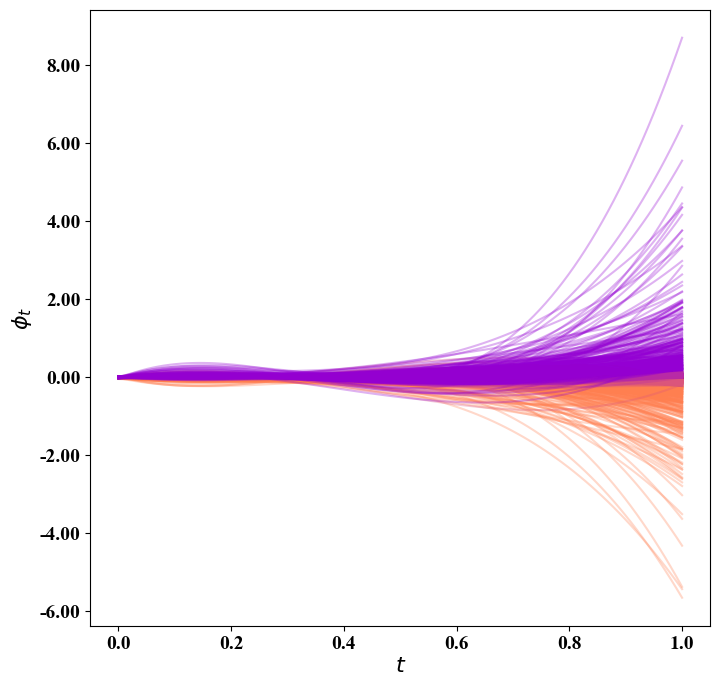

In [20]:
from PIL import Image
import io
plot_value_trajectories(time, value_traject)
plt.savefig(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/value_traj.pdf", bbox_inches='tight', dpi=600)

buf = io.BytesIO()
plt.savefig(buf, format='tiff', dpi=600, bbox_inches='tight')
buf.seek(0)

img = Image.open(buf)

img.save(f"../results/NDDV_traj_{dataset_name}_{model_name}_{noise_type}_{noise_rate=}_{train_count=}_{percent=}/value_traj.tif", compression="tiff_lzw")

buf.close()

### Discover noisy samples
- `discover_corrupted_sample` visualizes how well noisy data points are identified when a fraction of dataset is inspected. 

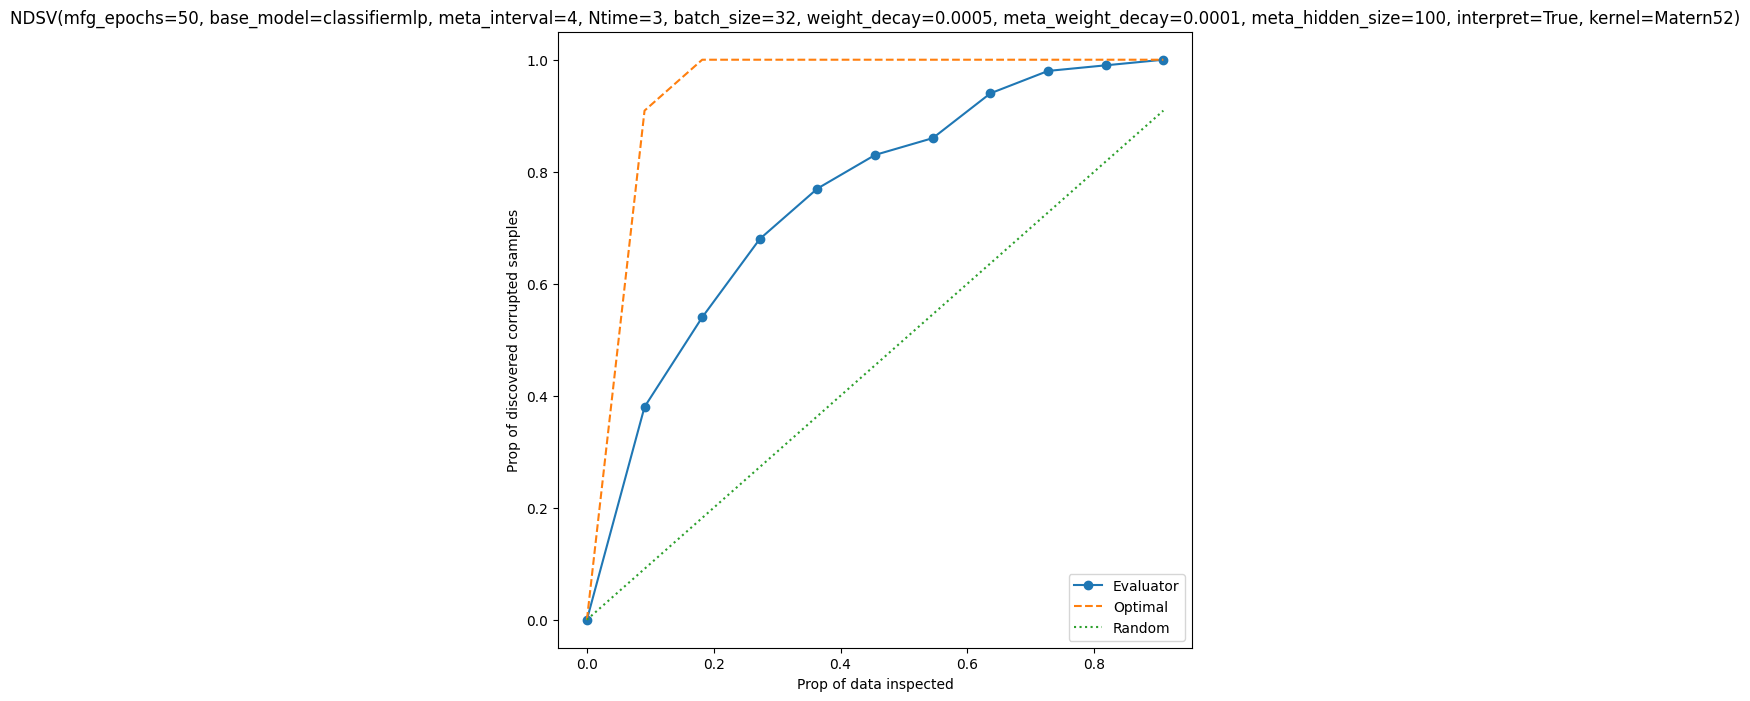

In [21]:
fig = plt.figure(figsize=(18, 8))
df, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, percnet=percent, save_output=True)

### Point removal experiment
- `remove_high_low` performs the point removal experiment. Each data valution algorithm, it provides two curves: one is removing data in a descending order (orange), the other is in an ascending order (blue). As for the orange (resp. blue) curve, the lower (resp. upper), the better. 

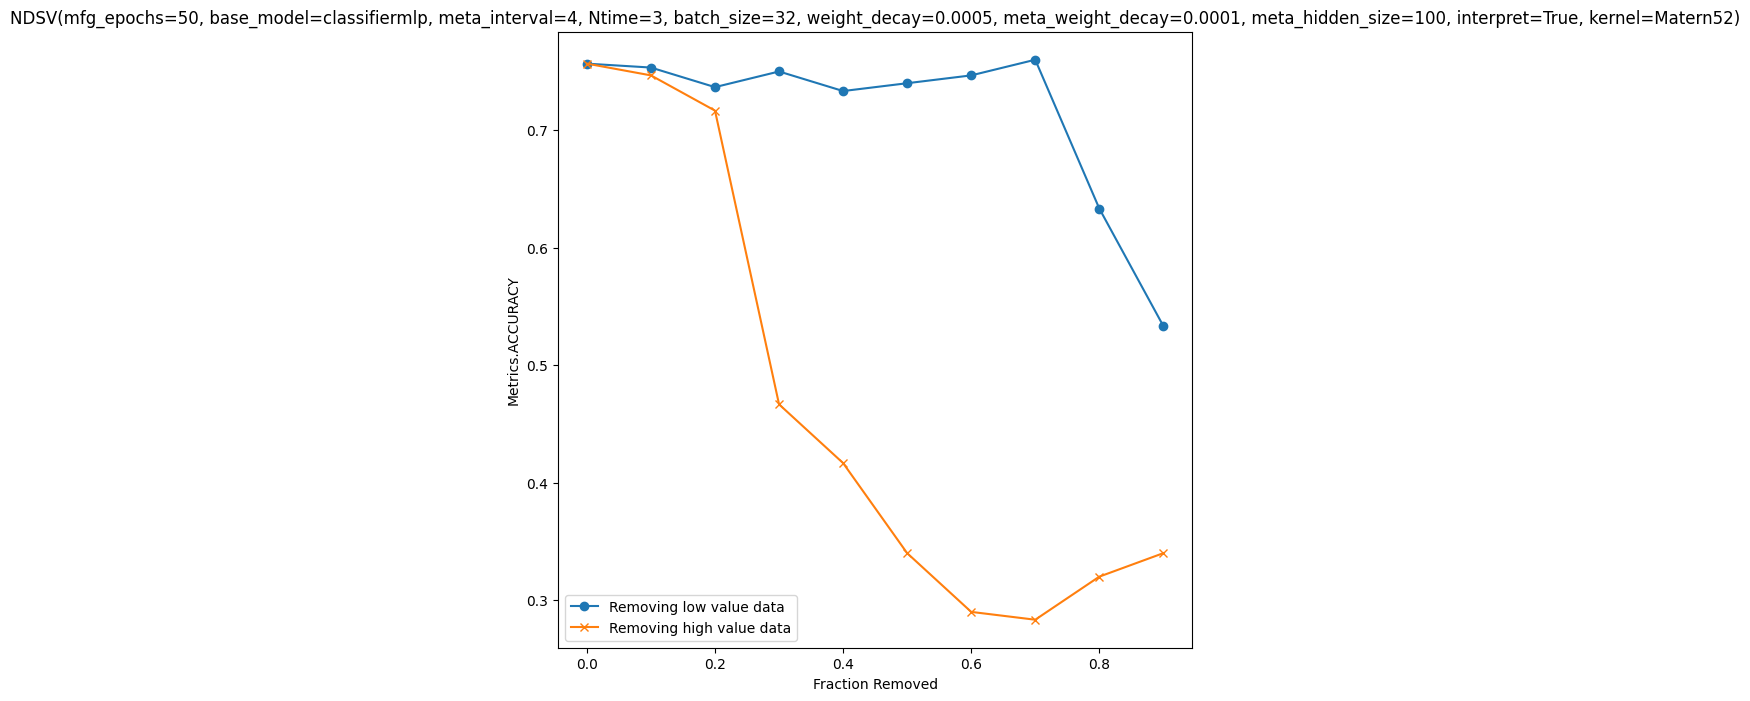

In [22]:
fig = plt.figure(figsize=(18, 8))
df_resp, fig = exper_med.plot(remove_high_low, fig, col=2, percnet=percent, save_output=True)

In [23]:
df_resp # it provides complete information for generating point-removal experiment figures.

,remove_least_influential_first_Metrics.ACCURACY,remove_most_influential_first_Metrics.ACCURACY,axis
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.756667,0.756667,0.0
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.753333,0.746667,0.1
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.736667,0.716667,0.2
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.75,0.466667,0.3
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.733333,0.416667,0.4
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.74,0.34,0.5
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.746667,0.29,0.6
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.76,0.283333,0.7
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.633333,0.32,0.8
"NDSV(mfg_epochs=50, base_model=classifiermlp, meta_interval=4, Ntime=3, batch_size=32, weight_decay=0.0005, meta_weight_decay=0.0001, meta_hidden_size=100, interpret=True, kernel=Matern52)",0.533333,0.34,0.9
